In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [6]:
df1=pd.read_csv('wiki_machine_learning.csv',sep=' ')
df=df1.copy()

In [7]:
df['date'].min(),df['date'].max()

('2015-01-01', '2016-01-20')

In [8]:
cols=['lang','page','rank','month','title']
df.drop(cols,axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.0+ KB


In [11]:
filterr=df['count']==0
df.loc[filterr]

,date,count
104,2015-02-05,0


In [12]:
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [13]:
filter2=df['count']!=0
df=df.loc[filter2]

In [14]:
df = df.sort_values('date')
df.isnull().sum()

date     0
count    0
dtype: int64

In [15]:
df=df.groupby(['date']).sum('count')
df

,count
date,
2015-01-01,1414
2015-01-02,1920
2015-01-03,1338
2015-01-04,1404
2015-01-05,2264
...,...
2016-01-16,1644
2016-01-17,1836
2016-01-18,2983


In [16]:
df.reset_index(inplace=True)

In [17]:
df

,date,count
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


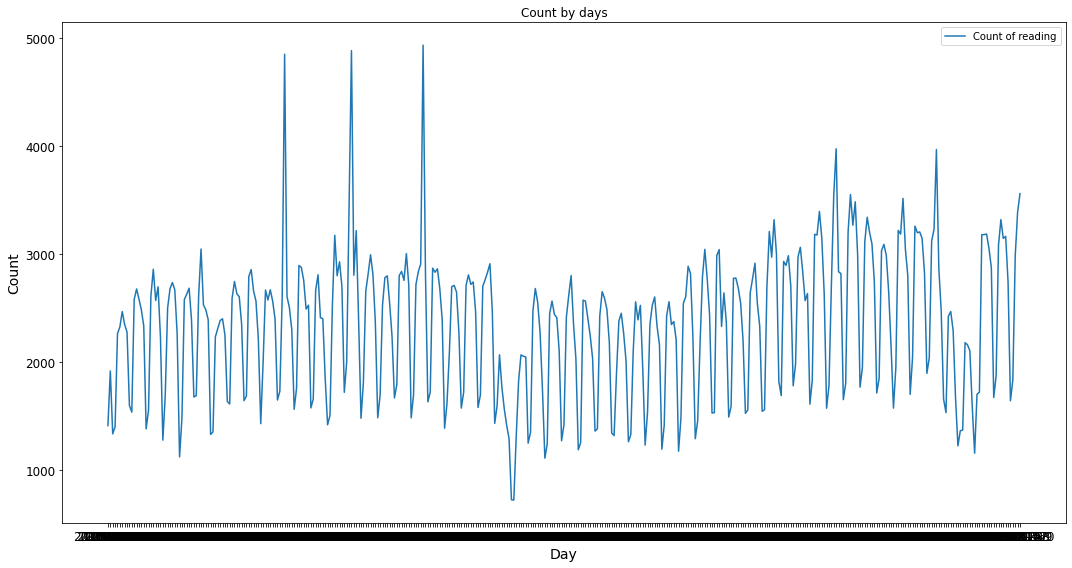

In [18]:
fig=plt.figure(figsize=(15,8))

plt.plot(df['date'],df['count'],label='Count of reading')
plt.title("Count by days")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
from fbprophet import Prophet
df = df.rename(columns={'date': 'ds', 'count': 'y'})
model = Prophet(interval_width=0.95)
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
forecast = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(forecast)

<Figure size 1296x432 with 0 Axes>

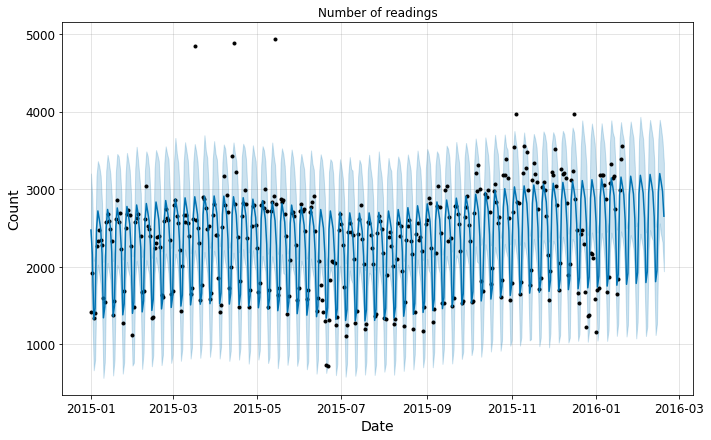

In [21]:
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Count')
plt.title('Number of readings');

In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2166.908800,1779.228230,3201.703083,2166.908800,2166.908800,306.674206,306.674206,306.674206,306.674206,306.674206,306.674206,0.0,0.0,0.0,2473.583006
1,2015-01-02,2169.640618,1440.973477,2872.022078,2169.640618,2169.640618,-15.941153,-15.941153,-15.941153,-15.941153,-15.941153,-15.941153,0.0,0.0,0.0,2153.699466
2,2015-01-03,2172.372436,665.221327,2076.959322,2172.372436,2172.372436,-850.308869,-850.308869,-850.308869,-850.308869,-850.308869,-850.308869,0.0,0.0,0.0,1322.063566
3,2015-01-04,2175.104254,800.829263,2139.272712,2175.104254,2175.104254,-711.365367,-711.365367,-711.365367,-711.365367,-711.365367,-711.365367,0.0,0.0,0.0,1463.738887
4,2015-01-05,2177.836071,1757.827480,3169.250291,2177.836071,2177.836071,302.088110,302.088110,302.088110,302.088110,302.088110,302.088110,0.0,0.0,0.0,2479.924182


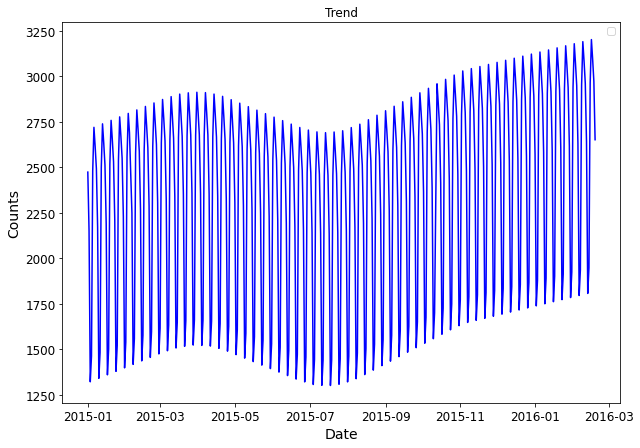

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Trend')
plt.show()

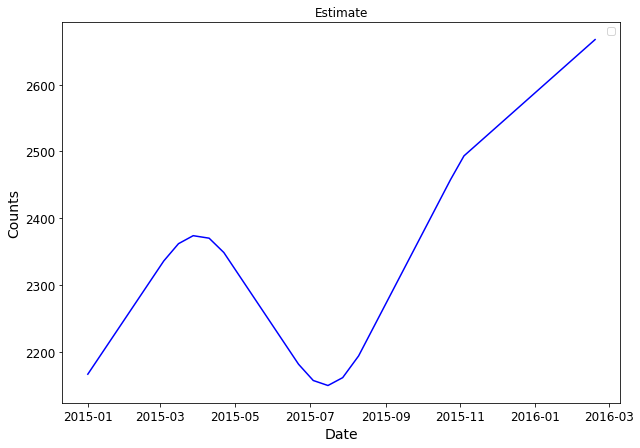

In [24]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['ds'], forecast['trend'], 'b-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Estimate')
plt.show()

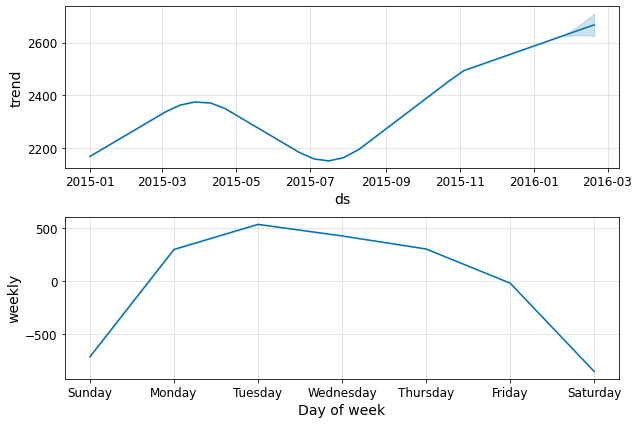

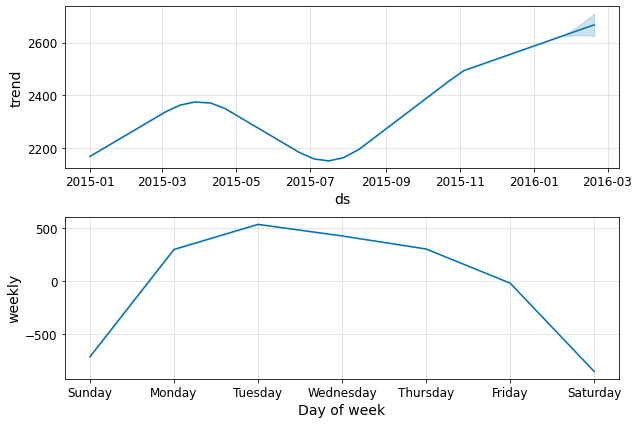

In [25]:
model.plot_components(forecast)

In [50]:
from neuralprophet import NeuralProphet

In [58]:
# model = NeuralProphet() if you're using default variables below.
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode='additive',
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [61]:
metrics = model.fit(df, validate_each_epoch=True, freq="MS") 
future = model.make_future_dataframe(df, periods=10, n_historic_predictions=len(df)) 
forecast = model.predict(future)

WARNING - (NP.forecaster.fit) - Model has already been fitted. Re-fitting will produce different results.
Epoch[40/40]: 100%|██████████| 40/40 [00:01<00:00, 24.96it/s, SmoothL1Loss=0.00874, MAE=191, MSE=9.41e+4, RegLoss=0, MAE_val=477, MSE_val=4.32e+5, SmoothL1Loss_val=0.0401]


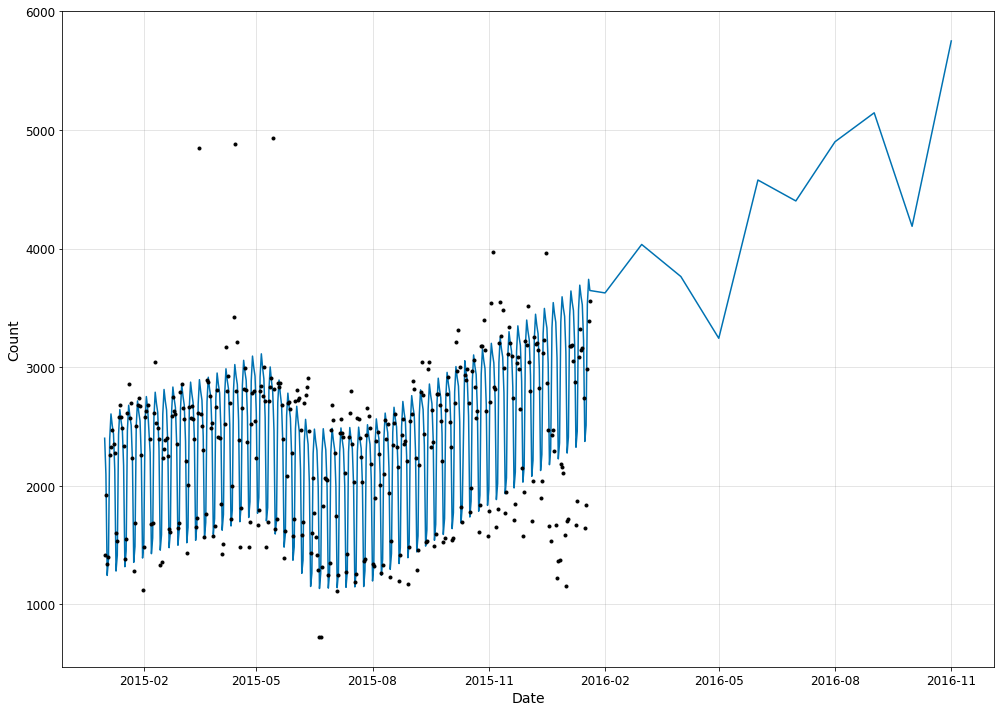

In [62]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Count", ax=ax);

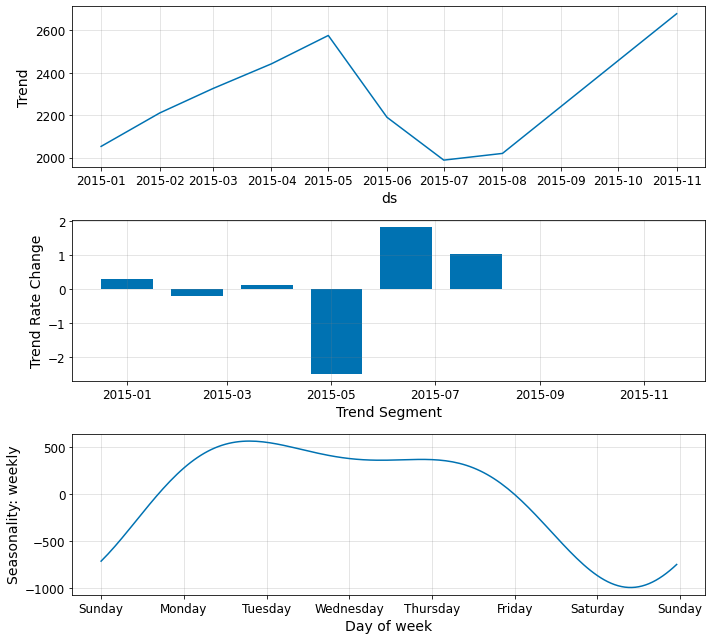

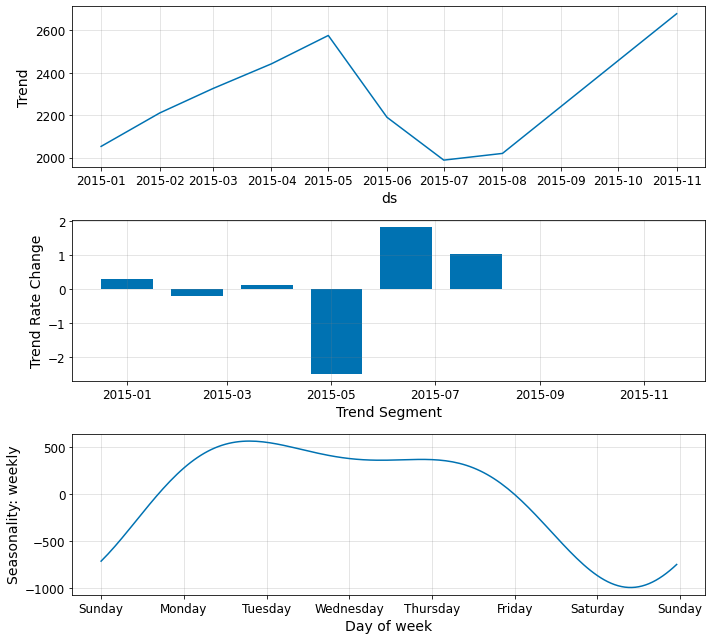

In [54]:
model.plot_parameters()